In [32]:
import pandas as pd

In [33]:
female = pd.read_csv('./Data/female.csv')
male = pd.read_csv('./Data/male.csv')


In [34]:
print(f'For women we have (rows, columns) {female.shape}')

print(f'For men we have (rows, columns) {male.shape}')

For women we have (rows, columns) (1986, 108)
For men we have (rows, columns) (4082, 108)


Notes:
When categorical labels must be created from continuous data without predefined standards, percentile-based segmentation provides a data-driven and interpretable solution.

In [35]:
def compute_percentile_ranges(column):
    #Define percentile ranges
    ranges = [(0, 5), (5, 25), (25, 50), (50, 75), (75, 90), (90, 97), (97, 100)]

    percentiles = {(low, high): (column.quantile(low/100), column.quantile(high/100)) for low, high in ranges}

    counts = {}

    for r, (low, high) in percentiles.items():
        counts[r] = ((column >= low) & (column < high)).sum()
    
    return counts


print(compute_percentile_ranges(female['chestcircumference']))
print(compute_percentile_ranges(female['biacromialbreadth']))

print(compute_percentile_ranges(male['chestcircumference']))
print(compute_percentile_ranges(male['biacromialbreadth']))


{(0, 5): np.int64(100), (5, 25): np.int64(396), (25, 50): np.int64(492), (50, 75): np.int64(499), (75, 90): np.int64(299), (90, 97): np.int64(140), (97, 100): np.int64(59)}
{(0, 5): np.int64(93), (5, 25): np.int64(377), (25, 50): np.int64(477), (50, 75): np.int64(541), (75, 90): np.int64(297), (90, 97): np.int64(139), (97, 100): np.int64(61)}
{(0, 5): np.int64(199), (5, 25): np.int64(810), (25, 50): np.int64(1025), (50, 75): np.int64(1012), (75, 90): np.int64(616), (90, 97): np.int64(295), (97, 100): np.int64(124)}
{(0, 5): np.int64(191), (5, 25): np.int64(787), (25, 50): np.int64(989), (50, 75): np.int64(1079), (75, 90): np.int64(610), (90, 97): np.int64(303), (97, 100): np.int64(122)}


In [36]:
def comput_size_percentile_measurements(data, chest_column, shoulder_column):
    sizes = ['XS', 'S', 'M', 'L', 'XL', '2XL', '3XL']
    ranges = [0, 5, 25 , 50, 75, 90, 97]

    # Compute the values for each percentile for chest and shoulder
    chest_percentiles = {p: data[chest_column].quantile(p/100) for p in ranges}
    shoulder_percentiles = {p: data[shoulder_column].quantile(p/100) for p in ranges}

    # Map the t-shirt sizes to the corresponding chest and shoulder measurements
    size_mappings = {}
    for i, size in enumerate(sizes):
        size_mappings[size] = {
            'Chest': int(chest_percentiles[ranges[i]]),
            'Shoulder': int(shoulder_percentiles[ranges[i]])
        }
    
    return size_mappings



print(comput_size_percentile_measurements(female, 'chestcircumference', 'biacromialbreadth'))
print(comput_size_percentile_measurements(male, 'chestcircumference', 'biacromialbreadth'))

{'XS': {'Chest': 695, 'Shoulder': 283}, 'S': {'Chest': 824, 'Shoulder': 335}, 'M': {'Chest': 889, 'Shoulder': 353}, 'L': {'Chest': 940, 'Shoulder': 365}, 'XL': {'Chest': 999, 'Shoulder': 378}, '2XL': {'Chest': 1057, 'Shoulder': 389}, '3XL': {'Chest': 1117, 'Shoulder': 400}}
{'XS': {'Chest': 774, 'Shoulder': 337}, 'S': {'Chest': 922, 'Shoulder': 384}, 'M': {'Chest': 996, 'Shoulder': 403}, 'L': {'Chest': 1056, 'Shoulder': 415}, 'XL': {'Chest': 1117, 'Shoulder': 428}, '2XL': {'Chest': 1172, 'Shoulder': 441}, '3XL': {'Chest': 1233, 'Shoulder': 452}}


In [37]:
#INITIAL SIZE TABLES - TO BE DELETED
# female_sizes = {
#     'XS': {'Chest': 695, 'Shoulder': 283}, 
#     'S': {'Chest': 824, 'Shoulder': 335}, 
#     'M': {'Chest': 889, 'Shoulder': 353}, 
#     'L': {'Chest': 940, 'Shoulder': 365}, 
#     'XL': {'Chest': 999, 'Shoulder': 378}, 
#     '2XL': {'Chest': 1057, 'Shoulder': 389}, 
#     '3XL': {'Chest': 1117, 'Shoulder': 400}
#     }

# male_sizes = {
#     'XS': {'Chest': 774, 'Shoulder': 337}, 
#     'S': {'Chest': 922, 'Shoulder': 384}, 
#     'M': {'Chest': 996, 'Shoulder': 403}, 
#     'L': {'Chest': 1056, 'Shoulder': 415}, 
#     'XL': {'Chest': 1117, 'Shoulder': 428}, 
#     '2XL': {'Chest': 1172, 'Shoulder': 441}, 
#     '3XL': {'Chest': 1233, 'Shoulder': 452}
#     }


female_sizes = {
    'XS': {'Chest': [695, 829], 'Shoulder': [283, 340]},
    'S':  {'Chest': [819, 894], 'Shoulder': [330, 358]},
    'M':  {'Chest': [884, 945], 'Shoulder': [348, 370]},
    'L':  {'Chest': [935, 1004], 'Shoulder': [360, 383]},
    'XL': {'Chest': [994, 1062], 'Shoulder': [373, 394]},
    '2XL': {'Chest': [1052, 1122], 'Shoulder': [384, 405]},
    '3XL': {'Chest': [1112, 2117], 'Shoulder': [395, 1400]}
}

male_sizes = {
    'XS': {'Chest': [774, 927], 'Shoulder': [337, 389]},
    'S':  {'Chest': [917, 1001], 'Shoulder': [379, 408]},
    'M':  {'Chest': [991, 1061], 'Shoulder': [398, 420]},
    'L':  {'Chest': [1051, 1122], 'Shoulder': [410, 433]},
    'XL': {'Chest': [1112, 1177], 'Shoulder': [423, 446]},
    '2XL': {'Chest': [1167, 1238], 'Shoulder': [436, 457]},
    '3XL': {'Chest': [1228, 2233], 'Shoulder': [447, 1452]}
}


In [38]:
SIZE_ORDER = ['XS', 'S', 'M', 'L', 'XL', '2XL', '3XL']

In [39]:
# def assign_size(value, size_chart, measurement_type):
#     sizes = list(size_chart.keys())
    
#     for i in range(len(sizes) - 1):
#         lower = size_chart[sizes[i]][measurement_type]
#         upper = size_chart[sizes[i + 1]][measurement_type]
        
#         if lower <= value < upper:
#             return sizes[i]
    
#     return sizes[-1]

In [40]:
# def count_size_matches_and_conflicts(data, size_chart):
#     matches = 0
#     conflicts = 0
    
#     for _, row in data.iterrows():
#         chest_size = assign_size(
#             row['chestcircumference'],
#             size_chart,
#             'Chest'
#         )
        
#         shoulder_size = assign_size(
#             row['biacromialbreadth'],
#             size_chart,
#             'Shoulder'
#         )
        
#         if chest_size == shoulder_size:
#             matches += 1
#         else:
#             conflicts += 1
    
#     return matches, conflicts


In [41]:
# female_matches, female_conflicts = count_size_matches_and_conflicts(
#     female,
#     female_sizes
# )

# male_matches, male_conflicts = count_size_matches_and_conflicts(
#     male,
#     male_sizes
# )

# print("Female - Matches:", female_matches, "Conflicts:", female_conflicts)
# print("Male - Matches:", male_matches, "Conflicts:", male_conflicts)


In [42]:
def find_possible_sizes(row, size_chart):
    possible_sizes = []

    for size, limits in size_chart.items():
        chest_min, chest_max = limits['Chest']
        shoulder_min, shoulder_max = limits['Shoulder']

        if (chest_min <= row['chestcircumference'] <= chest_max and
            shoulder_min <= row['biacromialbreadth'] <= shoulder_max):
            possible_sizes.append(size)

    return possible_sizes

In [43]:
# def count_matches_and_ties(data, size_chart):
#     matches = 0
#     ties = 0

#     for _, row in data.iterrows():
#         possible_sizes = find_possible_sizes(row, size_chart)

#         if len(possible_sizes) == 1:
#             matches += 1
#         elif len(possible_sizes) > 1:
#             ties += 1

#     return matches, ties


def count_matches_and_ties_with_resolution(data, size_chart):
    matches = 0
    ties = 0

    for _, row in data.iterrows():
        possible_sizes = find_possible_sizes(row, size_chart)

        if len(possible_sizes) == 1:
            matches += 1

        elif len(possible_sizes) > 1:
            possible_sizes = sorted(
                possible_sizes,
                key=lambda s: SIZE_ORDER.index(s)
            )

            
            indices = [SIZE_ORDER.index(s) for s in possible_sizes]

            if max(indices) - min(indices) == len(indices) - 1:
                matches += 1
            else:
                ties += 1

    return matches, ties



In [44]:
female_matches, female_ties = count_matches_and_ties_with_resolution(female, female_sizes)
male_matches, male_ties = count_matches_and_ties_with_resolution(male, male_sizes)

print("Female matches:", female_matches)
print("Female ties:", female_ties)
print("Male matches:", male_matches)
print("Male ties:", male_ties)

Female matches: 897
Female ties: 0
Male matches: 2144
Male ties: 0


In [45]:
def determine_individual_size(row, size_dict):
    chest_size = [s for s in SIZE_ORDER if row['chestcircumference'] >= size_dict[s]['Chest'][0] and row['chestcircumference'] <= size_dict[s]['Chest'][1]]
    shoulder_size = [s for s in SIZE_ORDER if row['biacromialbreadth'] >= size_dict[s]['Shoulder'][0] and row['biacromialbreadth'] <= size_dict[s]['Shoulder'][1]]
    matching = list(set(chest_size) & set(shoulder_size))
    if len(matching) == 1:
        return matching[0]
    elif len(matching) > 1:
        return max(matching, key=lambda s: SIZE_ORDER.index(s))
    else:
        return None

female['t-shirt size'] = female.apply(determine_individual_size, args=(female_sizes,), axis=1)
male['t-shirt size'] = male.apply(determine_individual_size, args=(male_sizes,), axis=1)

In [46]:
female_filtered = female.dropna(subset=['t-shirt size'])
male_filtered = male.dropna(subset=['t-shirt size'])

In [47]:
columns = ['chestcircumference', 'biacromialbreadth', 'weightkg', 'stature','t-shirt size']
female_filtered[columns].to_csv('./data/female_sized.csv', index=False)
male_filtered[columns].to_csv('./data/male_sized.csv', index=False)

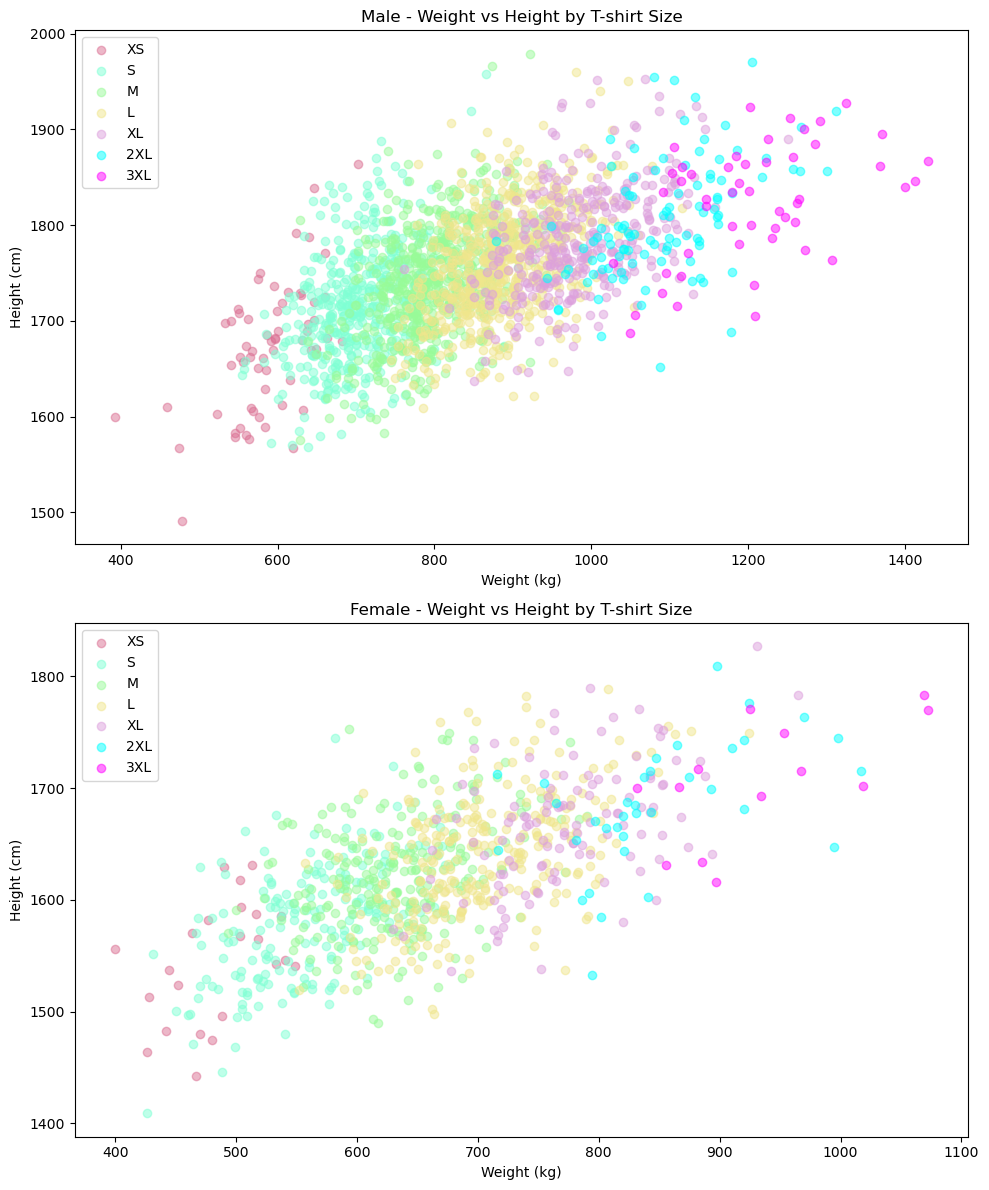

In [48]:
import matplotlib.pyplot as plt

colors = {'XS':'palevioletred','S':'aquamarine','M':'palegreen','L':'khaki','XL':'plum','2XL':'cyan','3XL':'fuchsia'}

fig, axes = plt.subplots(2,1, figsize=(10,12))

for ax, data, gender in zip(axes, [male_filtered, female_filtered], ['Male', 'Female']):
    for size, color in colors.items():
        subset = data[data['t-shirt size']==size]
        ax.scatter(subset['weightkg'], subset['stature'], c=color, alpha=0.5, label=size)
    ax.set_title(f'{gender} - Weight vs Height by T-shirt Size')
    ax.set_xlabel('Weight (kg)')
    ax.set_ylabel('Height (cm)')
    ax.legend()

plt.tight_layout()
plt.show()

In [49]:
female_dataset = pd.read_csv('./data/female_sized.csv')
male_dataset = pd.read_csv('./data/male_sized.csv')

female_X = female_dataset[['stature', 'weightkg']]
female_y = female_dataset['t-shirt size']

male_X = male_dataset[['stature', 'weightkg']]
male_y = male_dataset['t-shirt size']

In [50]:
female_X.head()
female_y.head()

0     XL
1      L
2      S
3     XL
4    2XL
Name: t-shirt size, dtype: object

In [51]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     female_X,
#     female_y,
#     test_size=0.2,
#     random_state=42
# )


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = female_filtered[['stature', 'weightkg']]
y = female_filtered['t-shirt size']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.42777777777777776

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [53]:
y_pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.45555555555555555


In [59]:
# for k in [3, 5, 7, 9, 11]:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     print(f"k={k}, accuracy={accuracy_score(y_test, y_pred):.3f}")

for k in range(3, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(k, acc)

3 0.46111111111111114
5 0.42777777777777776
7 0.4388888888888889
9 0.4388888888888889
11 0.4444444444444444
13 0.45


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

print("Scaled accuracy:", accuracy_score(y_test, y_pred_scaled))

Scaled accuracy: 0.42777777777777776


In [57]:
for test_size in [0.1, 0.2, 0.3]:
    X_tr, X_te, y_tr, y_te = train_test_split(
        female_X, female_y, test_size=test_size, random_state=42
    )
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_te)
    print(f"test_size={test_size}, accuracy={accuracy_score(y_te, y_pred):.3f}")

test_size=0.1, accuracy=0.500
test_size=0.2, accuracy=0.456
test_size=0.3, accuracy=0.433


In [58]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, female_X, female_y, cv=5)

print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

CV scores: [0.5        0.47777778 0.53631285 0.48603352 0.42458101]
Mean CV accuracy: 0.48494103041589065
